In [16]:
import pandas as pd
import re

In [11]:
df = pd.read_csv("taxable_values.csv",dtype=str)

In [12]:
df = df[0:37]

In [21]:
df['TAXING AUTHORITY'] = df['TAXING AUTHORITY'].str.replace('\d+','',regex=True)

In [22]:
df.to_csv("taxable_values_for_graphic.csv")

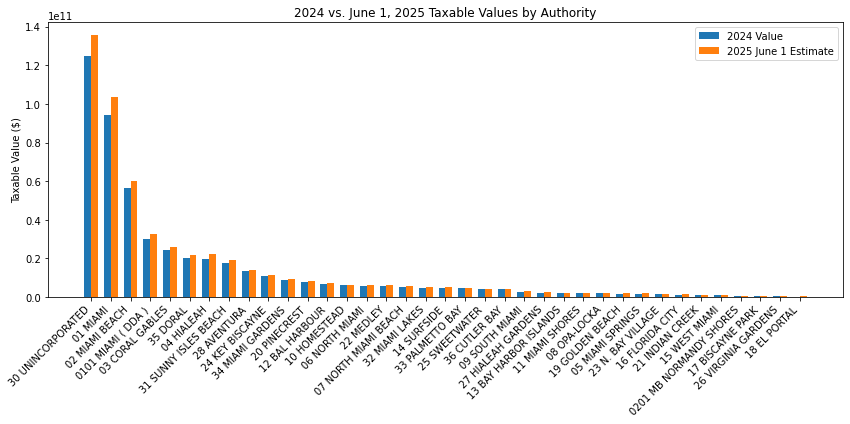

In [4]:
import matplotlib.pyplot as plt

# Assume df is already loaded as above

# Convert the numeric columns from strings to integers
df['2024'] = df['2024 PRELIMINARY TAXABLE VALUE'].astype(int)
df['2025_June1'] = df['2025 JUNE 1ST ESTIMATE'].astype(int)

# Sort by 2024 value (or 2025, depending on which ranking you prefer)
df_sorted = df.sort_values('2024', ascending=False)

# Plotting
x = range(len(df_sorted))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar([i - width/2 for i in x], df_sorted['2024'], width, label='2024 Value')
ax.bar([i + width/2 for i in x], df_sorted['2025_June1'], width, label='2025 June 1 Estimate')

ax.set_xticks(x)
ax.set_xticklabels(df_sorted['TAXING AUTHORITY'], rotation=45, ha='right')
ax.set_ylabel('Taxable Value ($)')
ax.set_title('2024 vs. June 1, 2025 Taxable Values by Authority')
ax.legend()

plt.tight_layout()
plt.show()


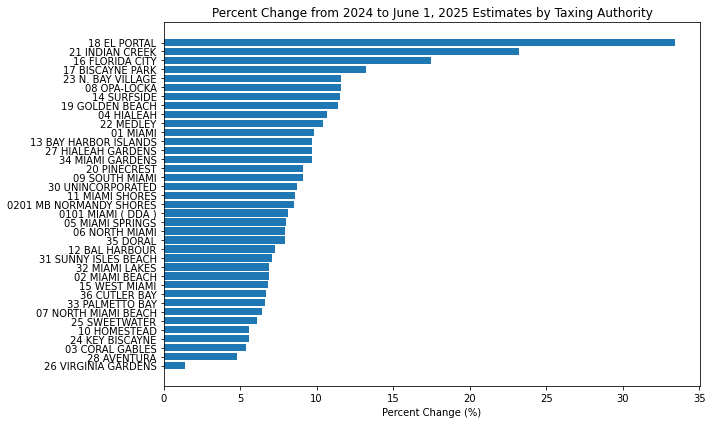

In [6]:
# Convert the "PERCENT CHANGE FROM 2024" column to numeric
df['Percent Change June 2025'] = df['PERCENT CHANGE FROM 2024'].str.rstrip('%').astype(float)

# Sort by percent change
df_sorted = df.sort_values('Percent Change June 2025', ascending=True)

# Plotting a horizontal bar chart for percent change
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(df_sorted['TAXING AUTHORITY'], df_sorted['Percent Change June 2025'])
ax.set_xlabel('Percent Change (%)')
ax.set_title('Percent Change from 2024 to June 1, 2025 Estimates by Taxing Authority')
plt.tight_layout()
plt.show()

In [23]:
# import plotly.graph_objects as go

# # Define the numeric columns we want to plot
# categories = [
#     '2024 PRELIMINARY TAXABLE VALUE',
#     '2025 ESTIMATED TAXABLE VALUE BEFORE NEW CONSTRUCTION',
#     'NEW CONSTRUCTION',
#     '2025 JUNE 1ST ESTIMATE',
#     'NET VALUE CHANGE'
# ]

# # Ensure numeric columns are float
# for col in categories:
#     df[col] = df[col].astype(float)

# # Prepare the first authority and its values for initializing the plot
# first_authority = df.loc[0, 'TAXING AUTHORITY']
# first_values = df.loc[0, categories].values

# # Create the initial bar chart trace
# fig = go.Figure()
# fig.add_trace(go.Bar(
#     x=categories,
#     y=first_values,
#     marker_color='orange',
#     name=first_authority
# ))

# # Build dropdown menu options for each authority
# dropdown_buttons = []
# for i, row in df.iterrows():
#     authority = row['TAXING AUTHORITY']
#     values = row[categories].values
#     dropdown_buttons.append(dict(
#         label=authority,
#         method='update',
#         args=[{'y': [values], 'name': authority},
#               {'title': f'Taxable Values for {authority}'}]
#     ))

# # Update layout with dropdown menu
# fig.update_layout(
#     updatemenus=[
#         dict(
#             active=0,
#             buttons=dropdown_buttons,
#             x=0.0,
#             y=1.15,
#             xanchor='left'
#             yanchor='top'
#         )
#     ],
#     title=f'Taxable Values for {first_authority}',
#     xaxis_title='Category',
#     yaxis_title='Value ($)',
#     margin=dict(l=40, r=40, t=80, b=40),
#     autosize=True
# )

# # Save the interactive figure as an HTML file
# fig.write_html('index.html')

# fig.show()


In [ ]:
import

base_name = 'https://trd-digital.github.io/trd-news-interactive-maps/'

cwd = os.getcwd()

cwd = cwd.split('/')

final_name = base_name + cwd[-1]
print(final_name)